In [31]:
import pandas as pd
import numpy as np
from sklearn import model_selection as split_dx
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import pickle as pkl

In [32]:
dx = pd.read_excel(r'C:\Users\Shriniwas\A VS CODE\15. Machine Learning\Simple Linear Regression Model\Electric City Bill Project\Electic_Bill.xlsx')

In [33]:
dx.columns

Index(['Month', 'Consumption', 'Total_Bill'], dtype='object')

In [34]:
dx.drop("Month", axis=1, inplace=True)

In [35]:
dx.dtypes

Consumption    int64
Total_Bill     int64
dtype: object

In [36]:
dx.shape

(11, 2)

In [37]:
dx.head()

,Consumption,Total_Bill
0,200,1500
1,250,1800
2,300,2100
3,350,2400
4,400,2700


In [38]:
x = dx.iloc[:, :1]  # Selecting 'Month' as Independent 
y = dx.iloc[:, -1]  # Selecting 'Bill Amount' as Dependent 

In [39]:
y.shape

(11,)

In [40]:
x_train, x_test, y_train, y_test = split_dx.train_test_split(x,y,test_size=0.20, random_state=0 )

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8, 1), (3, 1), (8,), (3,))

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = reg.predict(x_test)
y_pred

array([2700., 4200., 2100.])

In [45]:
comp = pd.DataFrame({"Actual" : y_test, "Prediction":y_pred})
comp

,Actual,Prediction
4,2700,2700.0
9,4200,4200.0
2,2100,2100.0


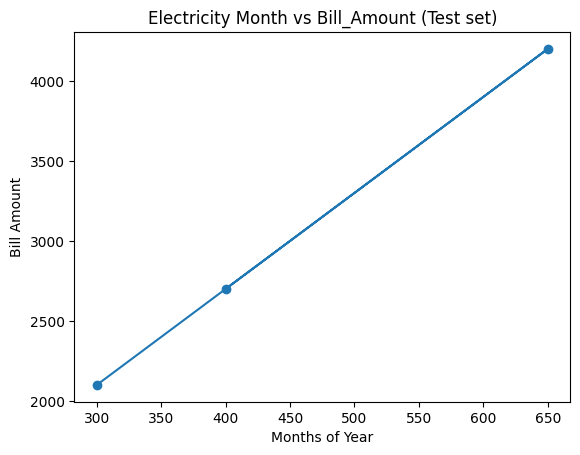

In [46]:
plt.scatter(x_test, y_test)
plt.plot(x_test, reg.predict(x_test))
plt.title('Electricity Month vs Bill_Amount (Test set)')
plt.xlabel('Months of Year')
plt.ylabel('Bill Amount')
plt.show()

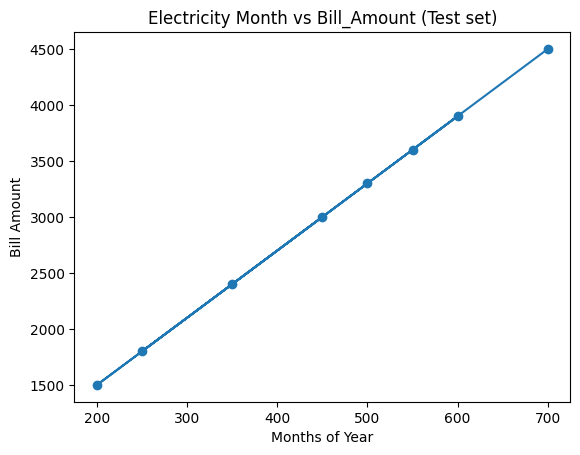

In [47]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))
plt.title('Electricity Month vs Bill_Amount (Test set)')
plt.xlabel('Months of Year')
plt.ylabel('Bill Amount')
plt.show()

In [48]:
print("Coefficient = ",reg.coef_)
print("Interception = ",reg.intercept_)

Coefficient =  [6.]
Interception =  300.00000000000045


In [49]:
y_mean= np.mean(y)
ssr = np.sum((y_pred- y_mean)**2)
ssr

np.float64(2340000.0)

In [50]:
y=y[0:3]
sse=np.sum((y - y_pred)**2)
sse

np.float64(7200000.0)

In [51]:
mean_total =np.mean(dx.values)
sst = np.sum((dx.values- mean_total)**2)
sst

np.float64(45938750.0)

In [52]:
np.isclose(sst, ssr + sse)

np.False_

In [53]:
print("Difference:", sst - (ssr + sse))

Difference: 36398750.0


In [54]:
r_square = 1-(ssr/sst)
r_square

np.float64(0.9490626105412098)

In [55]:
r_square

np.float64(0.9490626105412098)

In [56]:
r2 = r2_score(y_test, y_pred)
r2

1.0

### Save File

In [57]:
filename = 'Elec_LR_model.pkl'

### Open a file in write-binary mode and dump the model

In [58]:
with open(filename, 'wb') as file:
    pkl.dump(reg, file)
print("Model has been saved at - ", os.getcwd())

Model has been saved at -  c:\Users\Shriniwas\A VS CODE\15. Machine Learning\Simple Linear Regression Model\Electric City Bill Project


In [59]:
bia = reg.score(x_train, y_train)
bia

1.0

In [60]:
variance = reg.score(x_test, y_test)
variance 

1.0